In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# read the final aggregated movie data with additional information 
movie_data = pd.read_csv("../data/with_additional_data/military_hollywood_with_additional_data.csv")

In [3]:
movie_data.head()

,Title,IMDB_ID,Subtitle,Status,Media Type,Remarks,Year,genre,runtime,director,plot,award,imdb_rating,release_date,directors
0,"""1968""",Never Made,NaN,OTH,FILM,THE FILM STARTED OUT VERY NEGATIVE FOR THE ARM...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,000 MEN AND A BABY",tt0133231,NaN,APP,TV,VERY POSITIVE DEPICTION OF NAVY IN THIS KOREAN...,1997.0,Drama,96 min,Marcus Cole,A baby in a foreign land is adopted by the men...,NaN,6.9,07 Dec 1997,nm0170680
2,1ST FORCE,Never Made,NaN,OTH,FILM,INITIALLY DOD AND USMC WERE INCLINED TO SUPPOR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,tt0502209,22,APP,TV,APPROVED FILMING FOR ONE DAY WITH TWO MARINE C...,2004.0,"Action, Crime, Drama, Thriller",42 min,Frederick King Keller,Jack and Tony clash as they wait for the time ...,NaN,9.0,11 May 2004,nm0445631
4,3RD DEGREE,tt0098469,NaN,APP,TV,PERSONNEL APPEARED ON THIS GAME SHOW AT THE EX...,1989.0,"Crime, Drama, Thriller",100 min,Roger Spottiswoode,Scott Weston is a private investigator who is ...,NaN,5.7,28 May 1989,nm0006854


In [4]:
# select the data where we have the year information and then 
# group by the selected data based on the Year, Media Type and Status information, then count the movies of corresponding groupings
status_over_years = movie_data[movie_data.Year.notna()].groupby(['Year','Media Type','Status']).agg({'Status':'count'})

In [5]:
# rename the aggregated column as Number of Movies
status_over_years.rename(columns = {'Status': 'Number of Movies'}, inplace = True)
# reset the index
status_over_years= status_over_years.reset_index()
# convert the year values as integer to be able to use them as x-axis
status_over_years.Year = status_over_years.Year.astype(int)

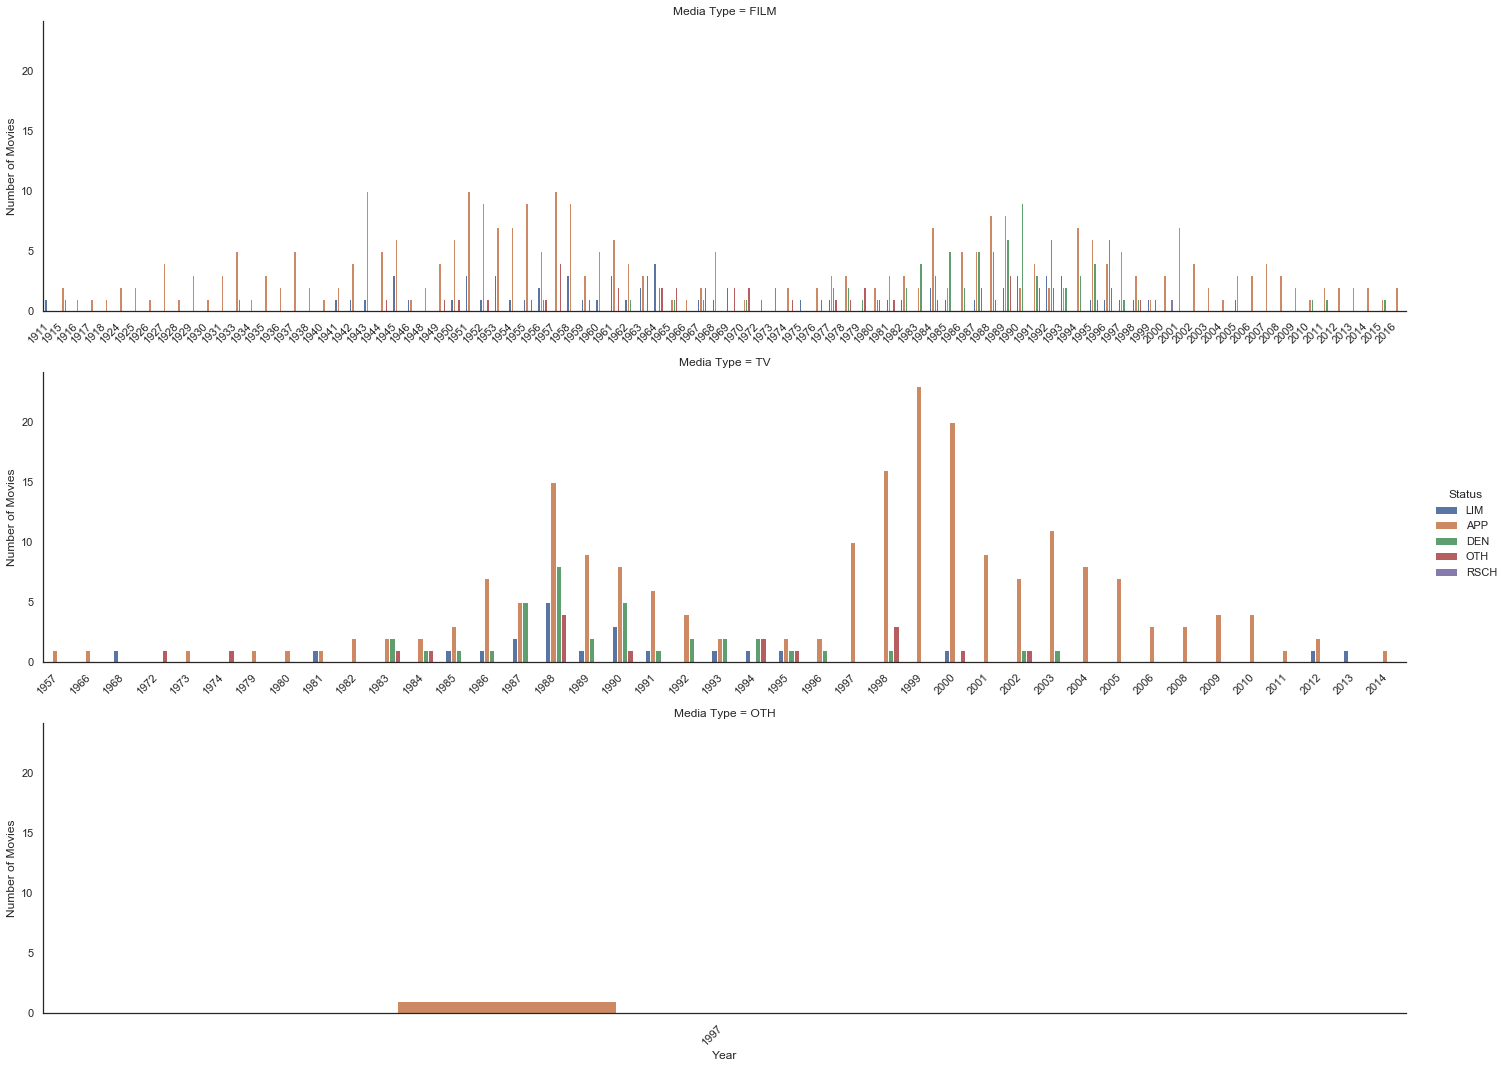

In [17]:
# how support/production assistance has changed over the time based on different media types
sns.set(rc={'figure.figsize':(12,36)})
sns.set_style("white")

g = sns.catplot(x="Year", 
                y="Number of Movies",
                ci=None,
                hue="Status", 
                col="Media Type",
                sharex=False, 
                sharey=True,
                data=status_over_years, 
                kind="bar",
                col_wrap=1,
                aspect=4)

(g.set_ylabels(fontsize=12)
  .set_xticklabels(rotation = 45, ha="right")
  .tight_layout())


In [13]:
# show the percentage of the movies by grouped sum over the movie type
media_type_status_data = movie_data[['Media Type','Status']].groupby(['Media Type','Status']).agg({'Status':'count'})
media_type_status_data.rename(columns = {'Status': 'Number of Movies'}, inplace = True)
media_type_status_data['sum_over_media_type'] = media_type_status_data.groupby('Media Type').transform('sum')
media_type_status_data['percentage'] = round(100*media_type_status_data['Number of Movies']/media_type_status_data['sum_over_media_type'],2)
media_type_status_data = media_type_status_data.reset_index()
media_type_status_data

,Media Type,Status,Number of Movies,sum_over_media_type,percentage
0,FILM,APP,322,553,58.23
1,FILM,DEN,106,553,19.17
2,FILM,LIM,67,553,12.12
3,FILM,OTH,57,553,10.31
4,FILM,RSCH,1,553,0.18
5,OTH,APP,1,1,100.00
6,TV,APP,216,303,71.29
7,TV,DEN,47,303,15.51
8,TV,LIM,23,303,7.59
9,TV,OTH,17,303,5.61


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


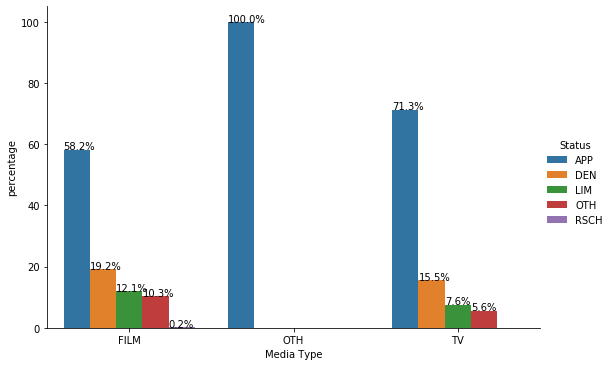

In [12]:
# visualise
g1 = sns.catplot(x='Media Type', 
                 y='percentage', 
                 ci=None, 
                 hue='Status', 
                 kind='bar', 
                 data=media_type_status_data,
                 aspect=1.5)


for p in g1.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g1.ax.text(txt_x,txt_y,txt)

In [14]:
# show the percentage of the movies by grouped sum over the status
status_media_type_data = movie_data[['Media Type','Status']].groupby(['Status','Media Type']).agg({'Status':'count'})
status_media_type_data.rename(columns = {'Status': 'Number of Movies'}, inplace = True)
status_media_type_data['sum_over_status'] = status_media_type_data.groupby('Status').transform('sum')
status_media_type_data['percentage'] = round(100*status_media_type_data['Number of Movies']/status_media_type_data['sum_over_status'],2)
status_media_type_data = status_media_type_data.reset_index()
status_media_type_data

,Status,Media Type,Number of Movies,sum_over_status,percentage
0,APP,FILM,322,539,59.74
1,APP,OTH,1,539,0.19
2,APP,TV,216,539,40.07
3,DEN,FILM,106,153,69.28
4,DEN,TV,47,153,30.72
5,LIM,FILM,67,90,74.44
6,LIM,TV,23,90,25.56
7,OTH,FILM,57,74,77.03
8,OTH,TV,17,74,22.97
9,RSCH,FILM,1,1,100.00


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


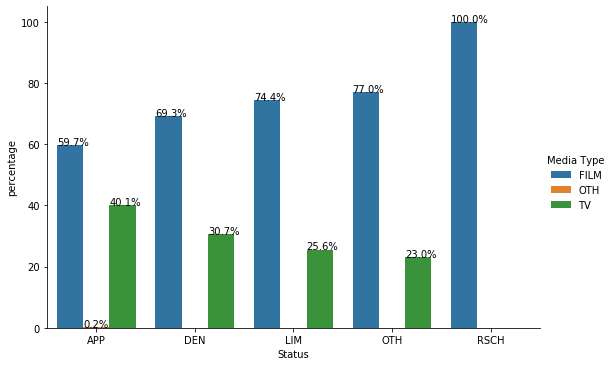

In [15]:
# visualise
g2 = sns.catplot(x='Status', 
                 y='percentage', 
                 ci=None, 
                 hue='Media Type', 
                 kind='bar', 
                 data=status_media_type_data,
                 aspect=1.5)


for p in g2.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g2.ax.text(txt_x,txt_y,txt)